In [1]:
from Bio import SeqIO

In [2]:
sequences = []
for record in SeqIO.parse("cds_from_genomic.fna", "fasta"):
    sequences.append(str(record.seq))

In [3]:
def kmerize(seq, k=6):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

In [4]:
sample = kmerize(sequences[0])

In [5]:
from SkipGram import SkipGrams

In [6]:
model = SkipGrams(sample , 5 , 50 ,100)

In [7]:
model.fit()

Epoch :  0
Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Epoch :  10
Epoch :  11
Epoch :  12
Epoch :  13
Epoch :  14
Epoch :  15
Epoch :  16
Epoch :  17
Epoch :  18
Epoch :  19
Epoch :  20
Epoch :  21
Epoch :  22
Epoch :  23
Epoch :  24
Epoch :  25
Epoch :  26
Epoch :  27
Epoch :  28
Epoch :  29
Epoch :  30
Epoch :  31
Epoch :  32
Epoch :  33
Epoch :  34
Epoch :  35
Epoch :  36
Epoch :  37
Epoch :  38
Epoch :  39
Epoch :  40
Epoch :  41
Epoch :  42
Epoch :  43
Epoch :  44
Epoch :  45
Epoch :  46
Epoch :  47
Epoch :  48
Epoch :  49
Epoch :  50
Epoch :  51
Epoch :  52
Epoch :  53
Epoch :  54
Epoch :  55
Epoch :  56
Epoch :  57
Epoch :  58
Epoch :  59
Epoch :  60
Epoch :  61
Epoch :  62
Epoch :  63
Epoch :  64
Epoch :  65
Epoch :  66
Epoch :  67
Epoch :  68
Epoch :  69
Epoch :  70
Epoch :  71
Epoch :  72
Epoch :  73
Epoch :  74
Epoch :  75
Epoch :  76
Epoch :  77
Epoch :  78
Epoch :  79
Epoch :  80
Epoch :  81
Epoch :  82
Epoch :  83
Ep

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [14]:
vectors = model.model.get_weights()
vectors[0:5]

tensor([[-7.4780e-01, -7.1010e-01, -1.2687e-02,  4.0369e-01,  6.4025e-02,
         -5.8926e-01, -8.1415e-01,  4.9741e-01, -9.8699e-01, -5.6485e-01,
          5.4871e-01, -1.4457e-01,  1.1214e+00, -3.8936e-01,  1.3327e-01,
         -1.1769e-01, -4.3622e-01, -1.3445e+00,  2.6555e-01,  1.1784e+00,
         -1.0700e+00,  2.9000e-01, -2.5346e-01, -7.6099e-01, -9.3556e-01,
          1.1021e+00, -5.5746e-02,  1.2304e+00, -3.4996e-01,  5.8165e-01,
          1.0096e+00, -9.2357e-02,  4.4571e-01,  1.2863e-02,  3.9933e-01,
         -6.9456e-02, -9.8397e-02, -5.7298e-01, -1.2546e+00,  2.8745e-01,
          9.8233e-01,  8.6553e-01,  5.2691e-01, -2.6994e-01,  1.4029e+00,
         -4.1150e-02, -7.6183e-02, -2.0781e-01,  1.9912e-01,  3.6135e-04],
        [-7.2704e-01, -3.6844e-01,  2.6788e-01, -5.4393e-01,  1.8247e+00,
         -1.3335e-02, -4.6222e-01,  8.4119e-01, -4.0668e-03,  5.4559e-01,
         -5.0940e-01, -4.7967e-01, -1.6416e+00,  4.9364e-01, -3.3242e-01,
          9.1290e-01,  2.0600e+00, -1

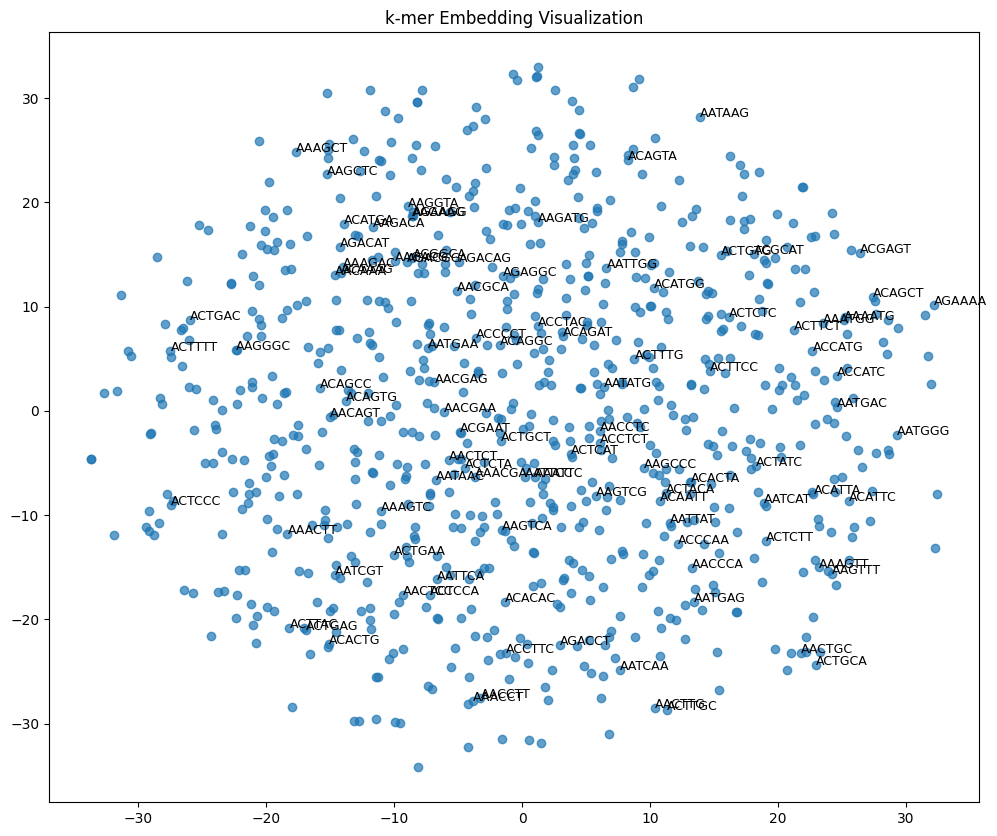

In [12]:
words = list(model.word2idx)
vectors = model.model.get_weights()

tsne = TSNE(n_components=2, random_state=42)
reduced = tsne.fit_transform(vectors)

plt.figure(figsize=(12, 10))
plt.scatter(reduced[:,0], reduced[:,1], alpha=0.7)
for i, word in enumerate(words[:100]):
    plt.text(reduced[i,0], reduced[i,1], word, fontsize=9)
plt.title("k-mer Embedding Visualization")
plt.show()